In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [63]:
print(df.shape)

(891, 12)


In [64]:
isna_cols=[c_name for c_name in df.columns if  df[c_name].isna().any()]
isna_cols

['Age', 'Cabin', 'Embarked']

In [65]:
ind= [ k for k,v in enumerate(df['Age'].isna()) if v ]
ind
len(ind)
# OR
# Count the number of null values in the 'Age' column
null_count = df['Age'].isna().sum()
print("Number of null values in 'Age' column:", null_count)

Number of null values in 'Age' column: 177


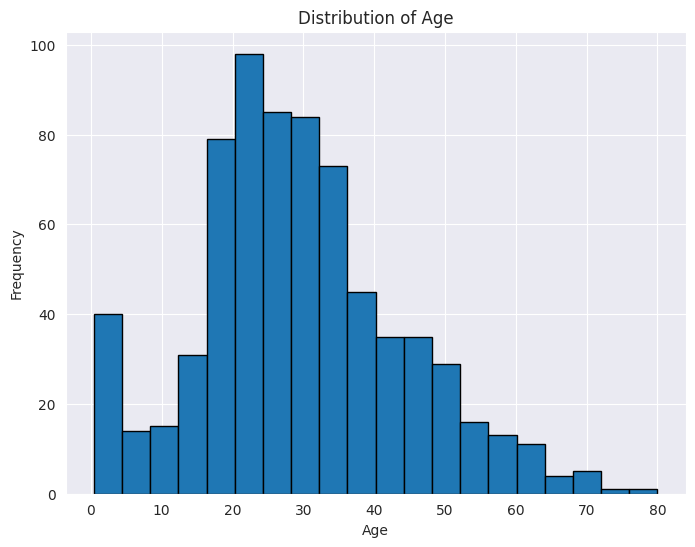

In [66]:
# Visualize the distribution of 'Age' column
plt.figure(figsize=(8, 6))
df['Age'].plot.hist(bins=20, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<Axes: xlabel='Embarked'>

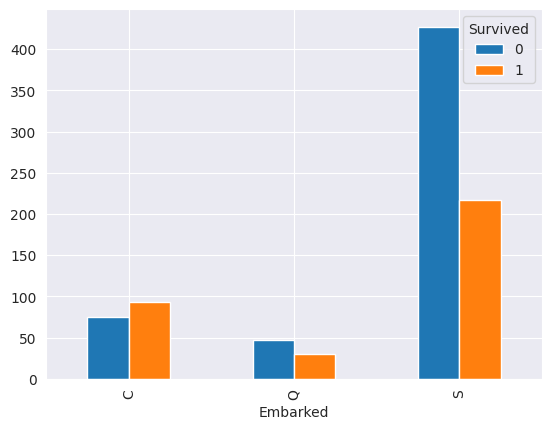

In [67]:
pd.crosstab(df.Embarked,df.Survived).plot(kind='bar')

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

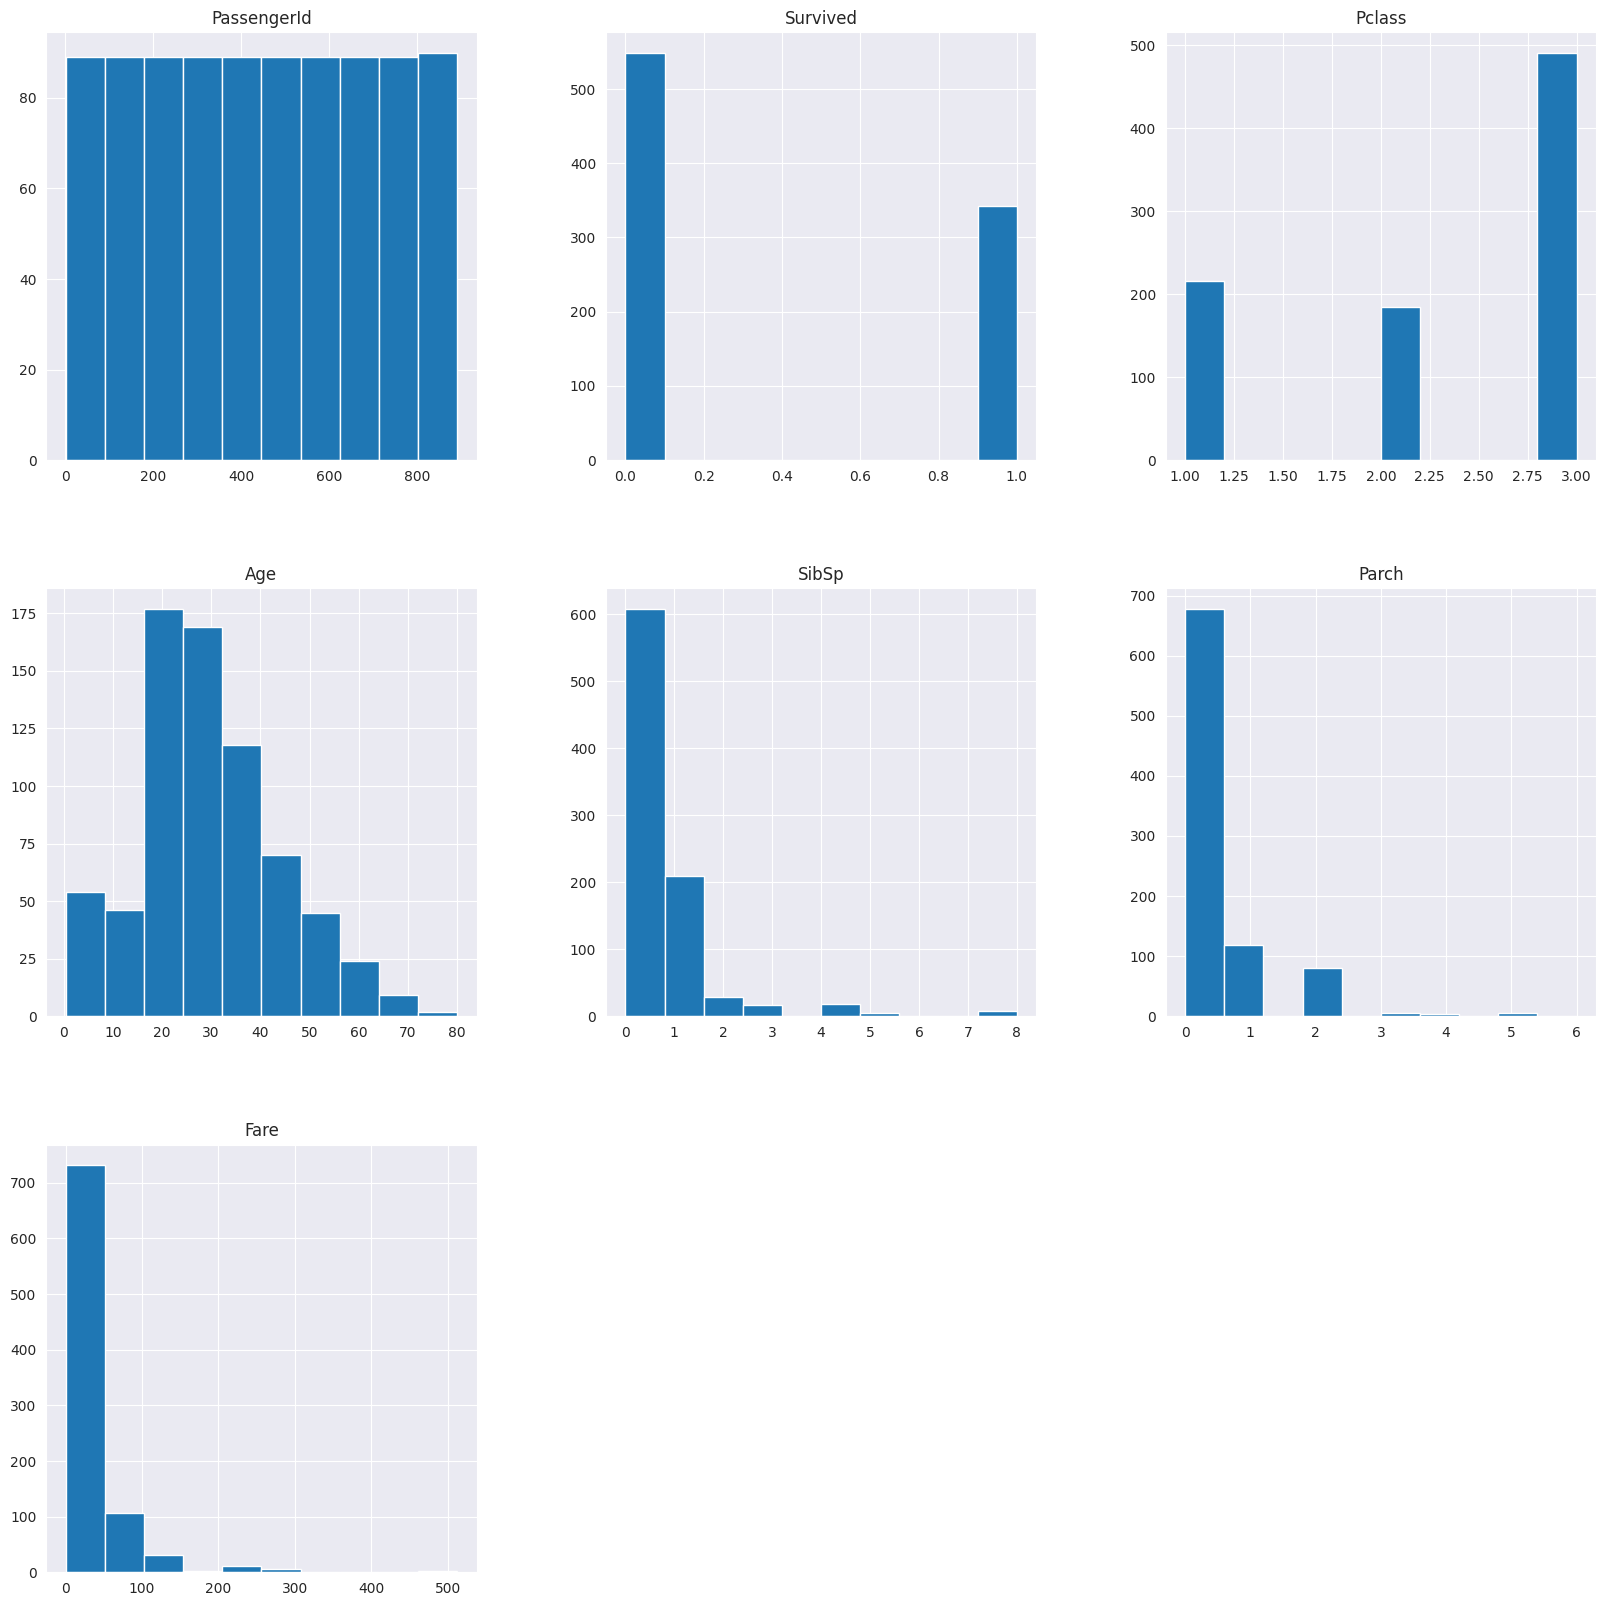

In [68]:
df.hist(figsize=(20,20))

<Figure size 1200x2000 with 0 Axes>

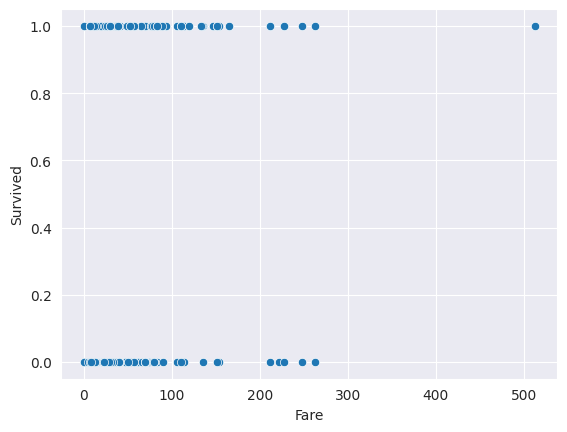

<Figure size 1200x2000 with 0 Axes>

In [69]:
sns.scatterplot(x=df['Fare'],y= df['Survived'])
plt.figure(figsize=(12,20))

In [70]:
# num_cols= [c_name for c_name in df.columns if df[c_name].dtype == 'int']
num_cols= [c_name for c_name in df.columns if df[c_name].dtype in('int',float)]
num_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [71]:
pd.crosstab(df['Sex'],df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [72]:
pd.crosstab(df['Pclass'],df['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [73]:
# pd.crosstab(df['Cabin'],df['Survived']).sum()
pd.crosstab(df['Cabin'],df['Survived'])


Survived,0,1
Cabin,,
A10,1,0
A14,1,0
A16,0,1
A19,1,0
A20,0,1
...,...,...
F33,0,3
F38,1,0
F4,0,2


In [74]:
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [75]:
# plt.figure(figsize=(40,20))
# pd.crosstab(df.Cabin,df.Survived).plot(kind='bar')
# plt.ylim(0,900)



In [76]:
pd.crosstab(df['Fare'],df['Survived'])

Survived,0,1
Fare,,
0.0000,14,1
4.0125,1,0
5.0000,1,0
6.2375,1,0
6.4375,1,0
...,...,...
227.5250,1,3
247.5208,1,1
262.3750,0,2


<Axes: >

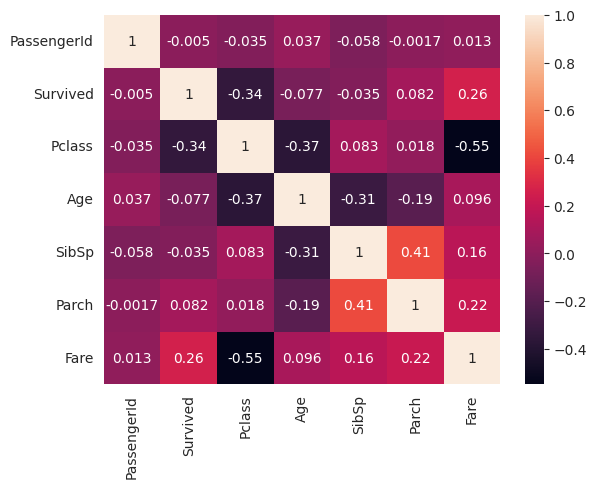

In [77]:
correlation_matrix = df[num_cols].corr()
sns.heatmap(data= correlation_matrix,annot=True)

In [78]:
df.columns
needed_col= ['Pclass',"Sex",'Age','SibSp','Parch','Fare','Embarked','Survived']
df_n = df[needed_col]
df_n

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,0
887,1,female,19.0,0,0,30.0000,S,1
888,3,female,NaN,1,2,23.4500,S,0
889,1,male,26.0,0,0,30.0000,C,1


In [79]:
df_n.isnull().any()

Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
Survived    False
dtype: bool

In [80]:
df_n['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [81]:
df_n['Embarked'].isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

In [82]:
# df_n['Sex']= df_n['Sex'].map({"male":0,'female':1})
# df_n

In [83]:
from sklearn.model_selection import train_test_split 
y= df_n['Survived']
X= df_n.drop('Survived',axis=1)
# X_train, X_test, y_train,y_test = train_test_split(X,y, random_state=0, test_size =0.2)
# X_train

In [84]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  LabelEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline

num_cols= ['Age']

# cat_cols =['Embarked']
cat_cols =['Sex','Embarked']

numerical_transformer = SimpleImputer(strategy ='most_frequent')

categorical_transformer =Pipeline( steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('one',OneHotEncoder())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num',numerical_transformer,num_cols),
        ('cat',categorical_transformer,cat_cols)
    ]
)

In [85]:
from sklearn import tree
from sklearn.linear_model import LogisticRegression
# lr_model =LogisticRegression()
t_model = tree.DecisionTreeClassifier()
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', t_model)
                             ])

# my_pipeline.fit(X_train,y_train)


In [86]:
from sklearn.model_selection import cross_val_score
# scores = cross_val_score(my_pipeline,X,y,cv=5, scoring='accuracy')
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')
scores

array([0.27374302, 0.2247191 , 0.25842697, 0.28651685, 0.25280899])

In [97]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.model_selection import cross_validate

# Define the desired scoring metrics
scoring_metrics = {'accuracy': 'accuracy',
                   'precision': 'precision',
                   'recall': 'recall'}

# Perform cross-validation with multiple scoring metrics
cv_results = cross_validate(my_pipeline, X, y, cv=5, scoring=scoring_metrics)

# Extract the scores for each metric
accuracy_scores = cv_results['test_accuracy']
precision_scores = cv_results['test_precision']
recall_scores = cv_results['test_recall']

# Print or use the scores as needed
print("Accuracy Scores:", accuracy_scores)
print("Precision Scores:", precision_scores)
print("Recall Scores:", recall_scores)

Accuracy Scores: [0.72625698 0.7752809  0.74157303 0.71910112 0.75280899]
Precision Scores: [0.66666667 0.76923077 0.7037037  0.6875     0.73584906]
Recall Scores: [0.57971014 0.58823529 0.55882353 0.48529412 0.56521739]


In [88]:
# cat_encoder = my_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['one']
# feature_names = cat_encoder.get_feature_names_out(input_features=cat_cols)
# 
# # Append numerical column names
# feature_names = np.concatenate([feature_names, num_cols])
# 
# # Extract coefficients
# coefficients = my_pipeline.named_steps['model'].coef_[0]
# 
# # Visualize Coefficients
# plt.figure(figsize=(10, 6))
# plt.bar(feature_names, coefficients)
# plt.xlabel('Feature')
# plt.ylabel('Coefficient')
# plt.title('Coefficients of Logistic Regression Model')
# plt.xticks(rotation=45)
# plt.show()


In [89]:

# preds = my_pipeline.predict(X_test)
# score = my_pipeline.score(X_test,y_test)
# print(f'Score of the Model is:{score}')

In [90]:
# from sklearn.tree import plot_tree
# 
# # Fit the pipeline (assuming you have already defined it)
# # my_pipeline.fit(X_train, y_train)
# 
# # Extract the decision tree model from the pipeline
# tree_model = my_pipeline.named_steps['model']
# 
# # Retrieve preprocessed feature names
# cat_cols = ['Sex', 'Embarked']  # Update with your categorical column names
# num_cols = ['Age']  # Update with your numerical column names
# 
# preprocessor = my_pipeline.named_steps['preprocessor']
# cat_transformer = preprocessor.named_transformers_['cat']
# cat_encoder = cat_transformer.named_steps['one']
# 
# # Get one-hot encoded feature names
# cat_feature_names = cat_encoder.get_feature_names_out(cat_cols)
# 
# # Append numerical column names
# feature_names_encoded = list(cat_feature_names) + num_cols
# 
# # Plot the decision tree
# plt.figure(figsize=(15, 10))
# plot_tree(tree_model, feature_names=feature_names_encoded, class_names=['Not Survived', 'Survived'], filled=True)
# plt.show()


AttributeError: 'ColumnTransformer' object has no attribute 'transformers_'

In [91]:
# from sklearn.tree import plot_tree
# 
# # Fit the pipeline (assuming you have already defined it)
# # my_pipeline.fit(X_train, y_train)
# 
# # Extract the decision tree model from the pipeline
# tree_model = my_pipeline.named_steps['model']
# 
# # Retrieve preprocessed feature names
# cat_cols = ['Sex', 'Embarked']  # Update with your categorical column names
# num_cols = ['Age']  # Update with your numerical column names
# 
# # Plot the decision tree
# plt.figure(figsize=(15, 10))
# plot_tree(tree_model, feature_names=cat_cols + num_cols, class_names=['Not Survived', 'Survived'], filled=True)
# plt.show()

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<Figure size 1500x1000 with 0 Axes>